In [4]:
from ler import LeR  # calling the package
import bilby
import numpy as np

In [5]:
#  CE A 20 Km
ifosCEA20 = bilby.gw.detector.interferometer.Interferometer(
    name = 'CEA20',
    power_spectral_density = bilby.gw.detector.PowerSpectralDensity(asd_file='./ce_strain/cosmic_explorer_20km_strain.txt'),
    minimum_frequency = 10.,
    maximum_frequency = 2048.,
    length = 20.,
    latitude = 46. + 0. / 60 + 0. / 3600,
    longitude = -(125 + 0. / 60 + 0. / 3600),
    elevation = 142.554,
    xarm_azimuth = 260.,
    yarm_azimuth = 260.+90.,
    xarm_tilt = 0.,
    yarm_tilt = 0., )

#  CE B 20 Km
ifosCEB20 = bilby.gw.detector.interferometer.Interferometer(
    name = 'CEB20',
    power_spectral_density = bilby.gw.detector.PowerSpectralDensity(asd_file='./ce_strain/cosmic_explorer_20km_strain.txt'),
    minimum_frequency = 10.,
    maximum_frequency = 2048.,
    length = 20.,
    latitude = 29. + 0. / 60 + 0. / 3600,
    longitude = -(94 + 0. / 60 + 0. / 3600),
    elevation = 142.554,
    xarm_azimuth = 200.,
    yarm_azimuth = 200.+90.,
    xarm_tilt = 0.,
    yarm_tilt = 0., )

# ET
# from bilby
# gives three L shape config
ifosET = bilby.gw.detector.networks.TriangularInterferometer(
    name = 'ET',
    power_spectral_density = bilby.gw.detector.PowerSpectralDensity(psd_file='ET_B_psd.txt'),
    length = 10,
    minimum_frequency = 10,
    maximum_frequency = 2048,
    latitude = 40. + 31. / 60 + 0. / 3600,
    longitude = 9. + 25. / 60 + 0. / 3600,
    elevation = 51.884,
    xarm_azimuth = 90.,
    yarm_azimuth = 90.+60.,
    xarm_tilt = 0.,
    yarm_tilt = 0.)

In [7]:
# initilize ler with gwsnr's input params 
# Config8 : “CE4020ET”: CE A 40 Km + CE B 20 Km + ET
my_psd = {'CEA40':'./ce_strain/cosmic_explorer_strain.txt', 'CEB20':'./ce_strain/cosmic_explorer_20km_strain.txt',\
         'ET1':'ET_B_psd.txt', 'ET2':'ET_B_psd.txt', 'ET3':'ET_B_psd.txt'}
my_ifos = [ifosCEA40, ifosCEB20] + ifosET 
my_psd_file = [False,False,True,True,True]

In [9]:
# initialization
# this also initializes the gwsnr (SNR calculator method)
ler = LeR(npool=int(6),z_min=0., z_max=20., 
           nsamples=1000000,
           batch_size=50000,
           mtot_min=2.,
           mtot_max=440.,  # highest total mass possible at 10Hz
           nsamples_mtot=200, 
           nsamples_mass_ratio=500,
           sampling_frequency=2048.,
           waveform_approximant = 'IMRPhenomD', 
           minimum_frequency = 10.,
           snr_type = 'interpolation', 
           waveform_inspiral_must_be_above_fmin=False,
           psds=my_psd,
           psd_file=my_psd_file,
           ifos=my_ifos)

Given: IMR waveform, {self.waveform_approximant}.
given psds:  {'CEA40': './ce_strain/cosmic_explorer_strain.txt', 'CEB20': './ce_strain/cosmic_explorer_20km_strain.txt', 'ET1': 'ET_B_psd.txt', 'ET2': 'ET_B_psd.txt', 'ET3': 'ET_B_psd.txt'}
Interpolator will be generated for CEA40 detector at ./interpolator_pickle/CEA40/halfSNR_dict_0.pickle
Interpolator will be generated for CEB20 detector at ./interpolator_pickle/CEB20/halfSNR_dict_0.pickle
Interpolator will be loaded for ET1 detector from ./interpolator_pickle/ET1/halfSNR_dict_0.pickle
Interpolator will be loaded for ET2 detector from ./interpolator_pickle/ET2/halfSNR_dict_0.pickle
Interpolator will be loaded for ET3 detector from ./interpolator_pickle/ET3/halfSNR_dict_0.pickle
Generating interpolator for ['CEA40', 'CEB20'] detectors


interpolation for each mass_ratios: 100%|█████████████████████████| 500/500 [04:33<00:00,  1.83it/s]

interpolator generated


In [10]:
ler.unlensed_cbc_statistics(json_file="./unlensed_params_BBH_CE_ET_1M.json",resume=True);  # unlensed param sampling

ler.unlensed_rate(gw_param="./unlensed_params_BBH_CE_ET_1M.json",jsonfile="./unlensed_params_detectable_BBH_CE_ET_1M.json");

ler.lensed_cbc_statistics(json_file="./lensed_params_BBH_CE_ET_1M.json", resume=True)  # lensed param sampling

ler.lensed_rate(lensed_param="./lensed_params_BBH_CE_ET_1M.json",jsonfile="./lensed_params_detectable_BBH_CE_ET_1M.json");

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 20 batche(s)
resuming from ./unlensed_params_BBH_CE_ET_1M.json
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...
Batch no. 5
sampling gw source params...
calculating snrs...
Batch no. 6
sampling gw source params...
calculating snrs...
Batch no. 7
sampling gw source params...
calculating snrs...
Batch no. 8
sampling gw source params...
calculating snrs...
Batch no. 9
sampling gw source params...
calculating snrs...
Batch no. 10
sampling gw source params...
calculating snrs...
Batch no. 11
sampling gw source params...
calculating snrs...
Batch no. 12
sampling gw source params...
calculating snrs...
Batch no. 13
sampling gw source params...
calculating snrs...
Batch no. 14
sampling gw source params

100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 6985.47it/s]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7032.52it/s]


calculating snrs...
Batch no. 3
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 6970.92it/s]


calculating snrs...
Batch no. 4
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7032.89it/s]


calculating snrs...
Batch no. 5
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7090.21it/s]


calculating snrs...
Batch no. 6
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7005.50it/s]


calculating snrs...
Batch no. 7
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7009.91it/s]


calculating snrs...
Batch no. 8
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7018.39it/s]


calculating snrs...
Batch no. 9
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7005.80it/s]


calculating snrs...
Batch no. 10
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7091.40it/s]


calculating snrs...
Batch no. 11
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7073.22it/s]


calculating snrs...
Batch no. 12
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7002.13it/s]


calculating snrs...
Batch no. 13
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7061.78it/s]


calculating snrs...
Batch no. 14
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 6975.03it/s]


calculating snrs...
Batch no. 15
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7057.02it/s]


calculating snrs...
Batch no. 16
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 6978.21it/s]


calculating snrs...
Batch no. 17
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7091.57it/s]


calculating snrs...
Batch no. 18
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7014.28it/s]


calculating snrs...
Batch no. 19
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7064.15it/s]


calculating snrs...
Batch no. 20
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:07<00:00, 7007.05it/s]


calculating snrs...
getting lensed_param from json file ./lensed_params_BBH_CE_ET_1M.json...
total lensed rate (yr^-1) (with step function): 86.56878185708025
storing detectable lensed params in ./lensed_params_detectable_BBH_CE_ET_1M.json...


In [9]:
from ler import LeR
ler = LeR()

Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_0.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_0.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_0.pickle


In [10]:
import json
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# getting data from json
# all
with open("./unlensed_params_BBH_CE_ET_1M.json") as f:
    unlensed_params = json.load(f)
with open("./lensed_params_BBH_CE_ET_1M.json") as f:
    lensed_params = json.load(f)
# detectable
with open("./unlensed_params_detectable_BBH_CE_ET_1M.json") as f:
    unlensed_params_detectable = json.load(f)
with open("./lensed_params_detectable_BBH_CE_ET_1M.json") as f:
    lensed_params_detectable = json.load(f)

## For redshift distributions 

In [11]:
# KDE plot Detectable+Undetectable for redshift distribution
# all
kde_unlensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params['zs']).reshape(-1,1))
kde_lensed = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zs']).reshape(-1,1))
kde_lenses = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params['zl']).reshape(-1,1))
# detectable
kde_unlensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(unlensed_params_detectable['zs']).reshape(-1,1))
kde_lensed_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zs']).reshape(-1,1))
kde_lenses_detectable = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(np.array(lensed_params_detectable['zl']).reshape(-1,1))

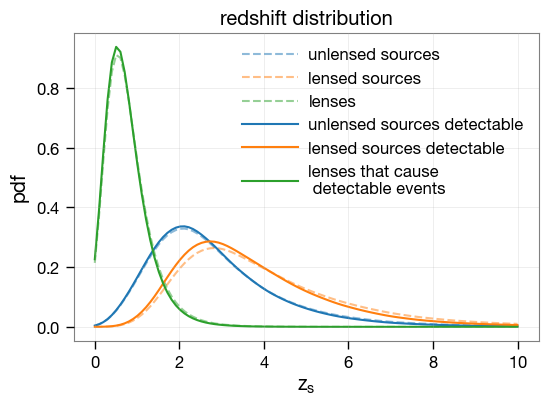

In [12]:
# plot
plt.figure(figsize=(6,4))
zs = np.linspace(0,10,100)
# all
plt.plot(zs, np.exp(kde_unlensed.score_samples(zs.reshape(-1,1))), label='unlensed sources', color='C0', linestyle='--', alpha=0.5)
plt.plot(zs, np.exp(kde_lensed.score_samples(zs.reshape(-1,1))), label='lensed sources', color='C1', linestyle='--', alpha=0.5)
plt.plot(zs, np.exp(kde_lenses.score_samples(zs.reshape(-1,1))), label='lenses', color='C2', linestyle='--', alpha=0.5)
# detectable
plt.plot(zs, np.exp(kde_unlensed_detectable.score_samples(zs.reshape(-1,1))), label='unlensed sources detectable', color='C0', linestyle='-')
plt.plot(zs, np.exp(kde_lensed_detectable.score_samples(zs.reshape(-1,1))), label='lensed sources detectable', color='C1', linestyle='-')
plt.plot(zs, np.exp(kde_lenses_detectable.score_samples(zs.reshape(-1,1))), label='lenses that cause \n detectable events', color='C2', linestyle='-')
plt.xlabel(r'$z_s$')
plt.ylabel('pdf')
leg = plt.legend(handlelength=4)
leg.get_lines()[0].set_linewidth(1.5)
leg.get_lines()[1].set_linewidth(1.5)
leg.get_lines()[2].set_linewidth(1.5)
leg.get_lines()[3].set_linewidth(1.5)
leg.get_lines()[4].set_linewidth(1.5)
leg.get_lines()[5].set_linewidth(1.5)
plt.grid(alpha=0.3)
plt.title('redshift distribution')
plt.savefig("redshift_distribution_conf1.png")

## $log_{10}\Delta t$ (days) vs $\Delta log_{10}\mu$

In [13]:
mu_rel0, dt_rel0, mu_rel90, dt_rel90 = \
    ler.relative_mu_dt_lensed(lensed_param=lensed_params_detectable, snr_threshold=[8.,8.])

dmu, dt = ler.relative_mu_dt_unlensed(param=unlensed_params_detectable, size=200)

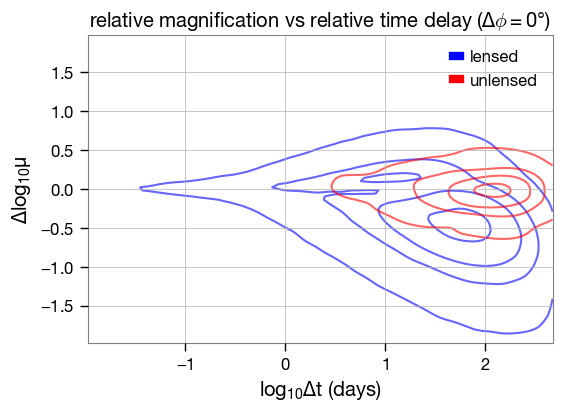

In [14]:
# plot
plt.figure(figsize=(6,4))
ler.mu_vs_dt_plot(x_array=dt_rel0, y_array=mu_rel0, ax=plt, colors='blue')
ler.mu_vs_dt_plot(x_array=dt, y_array=dmu, ax=plt, colors='red')
# labels
plt.xlabel(r"$log_{10}\Delta t$ (days)")
plt.ylabel(r"$\Delta log_{10}\mu$")
plt.title(r"relative magnification vs relative time delay ($\Delta \phi=0\degree$)")
# legend
custom_lines = [Line2D([0], [0], color='blue', lw=1.5),
                Line2D([0], [0], color='red', lw=1.5)]
plt.legend(custom_lines, ['lensed', 'unlensed'])
#plt.savefig("mu_vs_dt_conf1.png")
plt.show()

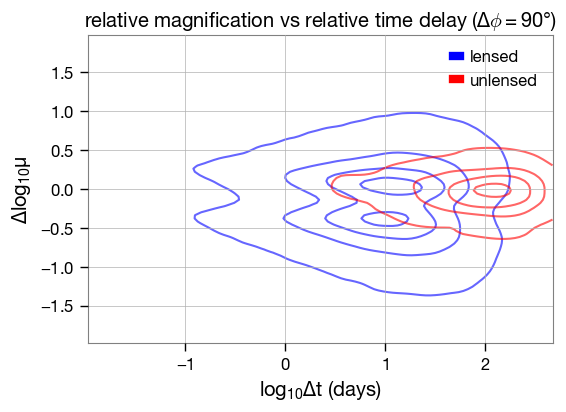

In [15]:
# plot
plt.figure(figsize=(6,4))
ler.mu_vs_dt_plot(x_array=dt_rel90, y_array=mu_rel90, ax=plt, colors='blue')
ler.mu_vs_dt_plot(x_array=dt, y_array=dmu, ax=plt, colors='red')
# labels
plt.xlabel(r"$log_{10}\Delta t$ (days)")
plt.ylabel(r"$\Delta log_{10}\mu$")
plt.title(r"relative magnification vs relative time delay ($\Delta \phi=90\degree$)")
# legend
custom_lines = [Line2D([0], [0], color='blue', lw=1.5),
                Line2D([0], [0], color='red', lw=1.5)]
plt.legend(custom_lines, ['lensed', 'unlensed'])
#plt.savefig("mu_vs_dt_conf1.png")
plt.show()

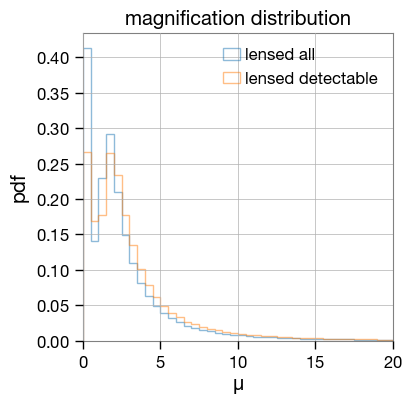

In [16]:
# plot for mu distribution
mu_all = np.array(lensed_params['magnifications']).flatten()
# select only non-nan values
mu_all = np.abs(mu_all[~np.isnan(mu_all)])
# select only values less than 20
mu_all = mu_all[mu_all<20]

# for detectable
mu_detectable = np.array(lensed_params_detectable['magnifications']).flatten()
# select only non-nan values
mu_detectable = np.abs(mu_detectable[~np.isnan(mu_detectable)])
# select only values less than 20
mu_detectable = mu_detectable[mu_detectable<20]

plt.hist(mu_all, bins=40, density=True, alpha=0.5, label='lensed all', histtype='step', linewidth=1)
plt.hist(mu_detectable, bins=40, density=True, alpha=0.5, label='lensed detectable', histtype='step', linewidth=1)
plt.xlim(0,20)
# label
plt.xlabel(r"$\mu$")
plt.ylabel("pdf")
# title
plt.title("magnification distribution")
plt.legend()
plt.show()